### **Case Study: "InfluencerNet"**

### 1. Frame the Problem

In this notebook, we will build a CNN classifier model from scratch that is able to distinguish images with logos from images without logo, then we'll improve our CNN model  by applying data augmentation and dropout regularization in an attempt to reduce overfitting as we may suspect given the small amount of data at hand. We will also leverage pretrained models and adapt them to our classification task. In this regards, we'll specifically look at the feature extraction and fine tuning techniques to improve our accuracy.


### 2. Get the Data

In [2]:
#Mounting the google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# Importing OS and shutil for high level operation on files
import os, shutil


In [4]:
#Checking the project files
os.listdir("/gdrive/MyDrive/Colab Notebooks/Image_mining")

['InfluencerNet_ImageContent.csv',
 'InfluencerNet_MetaData.csv',
 'InfluencerNet_Images']

In [5]:
# Defining the base directory for the data
path="/gdrive/MyDrive/Colab Notebooks/Image_mining/"
base_dir= path + 'InfluencerNet_Images'

In [82]:
#Reading the metadata and image content files
import pandas as pd
metaData=pd.read_csv(path + 'InfluencerNet_MetaData.csv')
imageContent= pd.read_csv(path + 'InfluencerNet_ImageContent.csv')

### 3. Explore the Data

Images files exploration

In [7]:
# Defining directories for the two classes of images and quering the number of images per class
LogoYes_dir= os.path.join(base_dir,'LogoYes_Tiny')
LogoNo_dir=os.path.join(base_dir,"LogoNo_Tiny")
print( "Total of LogoYes images:", len(os.listdir(LogoYes_dir)))
print( "Total of LogoNo images:", len(os.listdir(LogoNo_dir)))

Total of LogoYes images: 197
Total of LogoNo images: 370


In [8]:
# Checking the filenames in the directories
LogoYes_fnames = os.listdir(LogoYes_dir)
print(LogoYes_fnames[:10])

LogoNo_fnames = os.listdir(LogoNo_dir)
print(LogoNo_fnames[:10])

['xAA_uqb2l.jpg', 'pxbllaINDH8.jpg', 'qeXwHtmBEOc.jpg', 'KOaH1sO72S0.jpg', 'dAU84eYq6wM.jpg', 'TclITHdqipKU.jpg', '-jv94-xYy-E.jpg', 'pzdI6P4Lk60.jpg', 'DFVJA8x6Vi8.jpg', '6dFLHHmeUac.jpg']
['PzmmiWoJHA8.jpg', '8Gq1IU8rVsM.jpg', 'fiOU98HM2Uc.jpg', 'TqALOjrYE1A.jpg', 'IT5WI6IvSQ4.jpg', '_5-kOWfzHWM.jpg', 'mdOURFQld_o.jpg', 'BsVK78W97No.jpg', 'q4S6brzsUZc.jpg', 'g-1-PlSQuBs.jpg']


In [9]:
#let's take a look at a few pictures to get a better sense of what the logo images and non-logo images look like. First, configure the matplot parameters
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

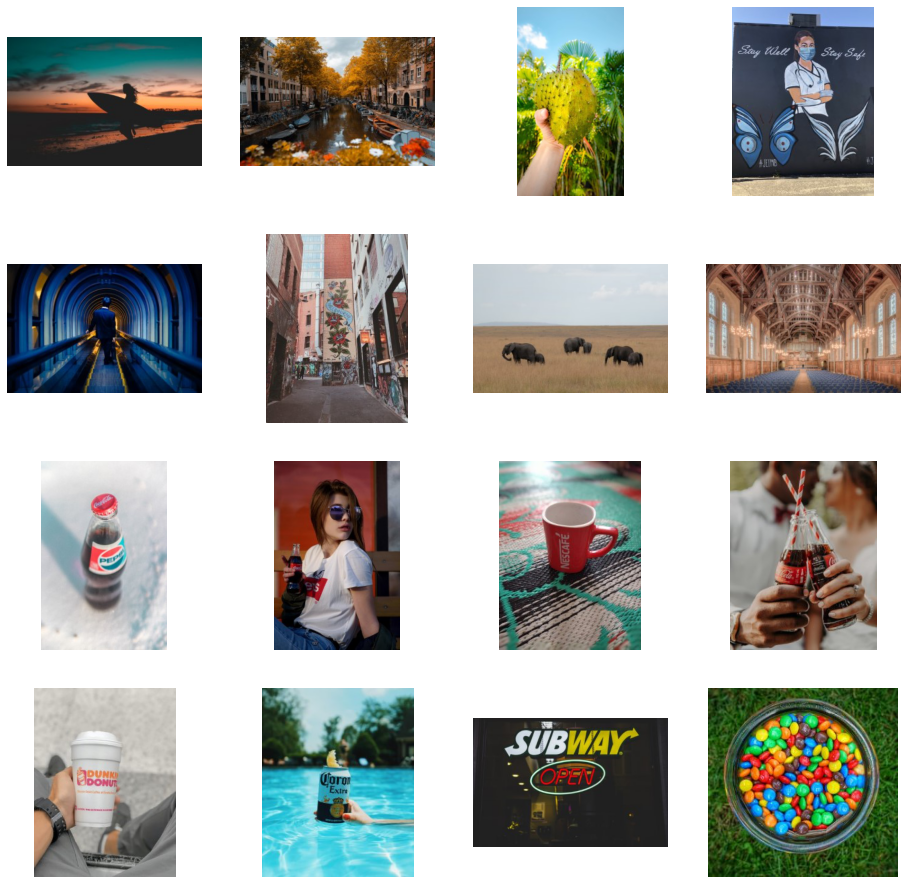

In [10]:
# Now, let's display a batch of 8 images without Logo and 8 pictures with **Logo**. We can rerun the cell to see a fresh batch each time:
#Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_LogoNo_pix = [os.path.join(LogoNo_dir, fname) 
                for fname in LogoNo_fnames[pic_index-8:pic_index]]
next_LogoYes_pix = [os.path.join(LogoYes_dir, fname) 
                for fname in LogoYes_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_LogoNo_pix+next_LogoYes_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

Metadata exploration

In [11]:
metaData.head(10)

,ID,URL,Publication Date,Views,Downloads,Contributor,Contributor's Social Media
0,EMvaZsixiC8,https://unsplash.com/photos/EMvaZsixiC8,"August 7, 2017",5.062.583,17.233,Caitlyn Hastings,@caitlynhastings
1,Xez19XDdbri,https://unsplash.com/photos/Xez19XDdbrI,"October 30, 2017",1.549.291,8.757,Raphael Nogueira,@phaelnogueira
2,Q-VwwVX_hgk,https://unsplash.com/photos/Q-VwwVX_hgk,"February 13, 2019",633.397,7.576,Fábio Alves,@barncreative
3,RFxUtsxkZrM,https://unsplash.com/photos/RFxUtsxkZrM,"April 30, 2018",717.761,2.041,RAKAN ALREQABI,@rak2n11
4,xAA_uqb2l,https://unsplash.com/photos/xAaa__uqb2I,"May 21, 2019",711.405,3.506,Parker Johnson,@pkripperprivate
5,mpiVPvhFIQM,https://unsplash.com/photos/mpiVPvhFIQM,"September 9, 2017",38.007,524.000,Daniel Wirtz,@danielwirtz
6,OxtbNfRYhzl,https://unsplash.com/photos/OxtbNfRYhzI,"April 29, 2020",498.816,813.000,Cassidy Kelley,@cassidykelley
7,4jy1DQKmX2w,https://unsplash.com/photos/4jy1DQKmX2w,"March 9, 2018",3.707.934,27.802,Guilherme Stecanella,@guilhermestecanella
8,QjeSYieQ634,https://unsplash.com/photos/QjeSYieQ634,"November 2, 2019",32.629,279.000,Nestor Cañizalez,@soynesty
9,XcX-D0FZ5fg,https://unsplash.com/photos/XcX-D0FZ5fg,"July 28, 2019",1.460.780,3.317,Erik Mclean,@introspectivedsgn


In [83]:
metaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          569 non-null    object 
 1   URL                         569 non-null    object 
 2   Publication Date            569 non-null    object 
 3   Views                       569 non-null    object 
 4   Downloads                   569 non-null    float64
 5   Contributor                 569 non-null    object 
 6   Contributor's Social Media  569 non-null    object 
dtypes: float64(1), object(6)
memory usage: 31.2+ KB


In [85]:
# Cleaning the column "Views"
metaData['Views'] = metaData['Views'].str.replace('.', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [86]:
# Converting Views in numeric
metaData['Views']=pd.to_numeric(metaData['Views'])

In [87]:
# Summary on number of views and downloads
metaData[['Views','Downloads']].describe()

,Views,Downloads
count,5.690000e+02,569.000000
mean,7.356323e+05,195.708018
std,2.076202e+06,296.558250
min,1.200000e+01,1.002000
25%,6.823600e+04,1.787000
50%,2.866610e+05,6.263000
75%,5.491690e+05,317.000000
max,3.341865e+07,995.000000


In [71]:
# Top 5 images downloaded
metaData.sort_values(by='Downloads', ascending=False).head(5)

,ID,URL,Publication Date,Views,Downloads,Contributor,Contributor's Social Media
373,Kj49-sLEtgs,https://unsplash.com/photos/Kj49-sLEtgs,"September 5, 2020",252.811,995.0,Ben Karpinski,@benkarpinski
455,oBmF2jt2ldg,https://unsplash.com/photos/oBmF2jt2ldg,"July 30, 2020",135.147,995.0,Quinton Coetzee,@quinietjie
483,SjN0li2zQJA,https://unsplash.com/photos/SjN0li2zQJA,"June 26, 2020",300.115,993.0,Anasta Olson,@anastaxolson
397,7rA9Y12GNdk,https://unsplash.com/photos/7rA9Y12GNdk,"September 3, 2020",194.127,972.0,Johanser Martinez,@johanser
405,B0II_k2hz3E,https://unsplash.com/photos/B0II_k2hz3E,"September 5, 2020",308.391,968.0,Nick Jones,@nickxjones_


In [88]:
# Top 5 images viewed
metaData.sort_values(by='Views', ascending=False).head(5)

,ID,URL,Publication Date,Views,Downloads,Contributor,Contributor's Social Media
538,cAtzHUz7Z8g,https://unsplash.com/photos/cAtzHUz7Z8g,27-Jul-16,33418648.0,388.611,Tim Marshall,@timmarshall
384,dpbXgTh0Lac,https://unsplash.com/photos/dpbXgTh0Lac,2-Jul-20,14911967.0,84.078,XPS,Designed to be the Best ↗
559,fXls-tVemno,https://unsplash.com/photos/fXls-tVemno,5-May-18,14835138.0,78.551,JOSHUA COLEMAN,@joshstyle
544,VBoa34qcW4w,https://unsplash.com/photos/VBoa34qcW4w,22-Mar-16,12569085.0,61.851,Seth Doyle,@sethdoylee
542,Ds0ZIA5gzc4,https://unsplash.com/photos/Ds0ZIA5gzc4,23-Sep-16,10967880.0,68.457,Nina Strehl,@ninastrehl


In [66]:
# Number of contributors
metaData['Contributor'].nunique()

463

### 4. Prepare the Data

In [14]:
# Creating directories for storing our dataset for preparation purposes. Given the unbalanced nature and the very limited
# sized of our dataset, we will intentionally make the training and validation sets balanced.
# The training set will contain 100 images of each class, the validation set  will contain 50 images of each set and the 
# test set will contain the rest of images

prep_dir = '/gdrive/MyDrive/Colab Notebooks/Image_mining/LogoYes_LogoNo'
os.mkdir(prep_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(prep_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(prep_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(prep_dir, 'test')
os.mkdir(test_dir)

# Directory with our training LogoYes pictures
train_LogoYes_dir = os.path.join(train_dir, 'LogoYes')
os.mkdir(train_LogoYes_dir)

# Directory with our training LogoNo pictures
train_LogoNo_dir = os.path.join(train_dir, 'LogoNo')
os.mkdir(train_LogoNo_dir)

# Directory with our validation LogoYes pictures
validation_LogoYes_dir = os.path.join(validation_dir, 'LogoYes')
os.mkdir(validation_LogoYes_dir)

# Directory with our validation LogoNo pictures
validation_LogoNo_dir = os.path.join(validation_dir, 'LogoNo')
os.mkdir(validation_LogoNo_dir)

# Directory with our test LogoYes pictures
test_LogoYes_dir = os.path.join(test_dir, 'LogoYes')
os.mkdir(test_LogoYes_dir)

# Directory with our test LogoNo pictures
test_LogoNo_dir = os.path.join(test_dir, 'LogoNo')
os.mkdir(test_LogoNo_dir)
# Copy first 100 LogoNo images to train_LogoNo_dir
fnames = LogoNo_fnames[:100]
for fname in fnames:
    src = os.path.join(LogoNo_dir, fname)
    dst = os.path.join(train_LogoNo_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 50 LogoNo images to validation_LogoNo_dir
fnames = LogoNo_fnames[100:150]
for fname in fnames:
    src = os.path.join(LogoNo_dir, fname)
    dst = os.path.join(validation_LogoNo_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 220 LogoNo images to test_LogoNo_dir
fnames = LogoNo_fnames[150:]
for fname in fnames:
    src = os.path.join(LogoNo_dir, fname)
    dst = os.path.join(test_LogoNo_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 100 LogoYes images to train_LogoYes_dir
fnames = LogoYes_fnames[:100]
for fname in fnames:
    src = os.path.join(LogoYes_dir, fname)
    dst = os.path.join(train_LogoYes_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 50 LogoYes images to validation_LogoYes_dir
fnames = LogoYes_fnames[100:150]
for fname in fnames:
    src = os.path.join(LogoYes_dir, fname)
    dst = os.path.join(validation_LogoYes_dir, fname)
    shutil.copyfile(src, dst)
    # Copy next 47 LogoYes images to test_LogoYes_dir
fnames = LogoYes_fnames[150:]
for fname in fnames:
    src = os.path.join(LogoYes_dir, fname)
    dst = os.path.join(test_LogoYes_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
# Sanity check
print('total training LogoYes images:', len(os.listdir(train_LogoYes_dir)))

total training LogoYes images: 100


In [16]:
print('total training LogoNo images:', len(os.listdir(train_LogoNo_dir)))

total training LogoNo images: 100


In [17]:
print('total validation LogoYes images:', len(os.listdir(validation_LogoYes_dir)))

total validation LogoYes images: 50


In [18]:
print('total validation LogoNo images:', len(os.listdir(validation_LogoNo_dir)))

total validation LogoNo images: 50


In [19]:
print('total test LogoYes images:', len(os.listdir(test_LogoYes_dir)))

total test LogoYes images: 47


In [20]:
print('total test LogoNo images:', len(os.listdir(test_LogoNo_dir)))

total test LogoNo images: 220


In [21]:
# Building the network
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [23]:
# Getting the model ready for training
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [24]:
# Data Prepocessing
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [25]:
#Checking the data batch from the Image generator
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### 5. Shortlist Promising Models

In [26]:
# training the forst model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


10/10 [==============================] - 14s 124ms/step - loss: 0.7312 - acc: 0.4750 - val_loss: 0.6922 - val_acc: 0.5000
Epoch 2/30
10/10 [==============================] - 1s 128ms/step - loss: 0.6885 - acc: 0.5000 - val_loss: 0.7007 - val_acc: 0.5000
Epoch 3/30
10/10 [==============================] - 2s 187ms/step - loss: 0.6877 - acc: 0.5150 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 4/30
10/10 [==============================] - 1s 109ms/step - loss: 0.6664 - acc: 0.6100 - val_loss: 0.6860 - val_acc: 0.5600
Epoch 5/30
10/10 [==============================] - 1s 109ms/step - loss: 0.6557 - acc: 0.6750 - val_loss: 0.6895 - val_acc: 0.5500
Epoch 6/30
10/10 [==============================] - 1s 120ms/step - loss: 0.6468 - acc: 0.6800 - val_loss: 0.6882 - val_acc: 0.5400
Epoch 7/30
10/10 [==============================] - 1s 109ms/step - loss: 0.6282 - acc: 0.6600 - val_loss: 0.7094 - val_acc: 0.5100
Epoch 8/30
10/10 [==============================] - 1s 109ms/step - loss: 0.6052 - acc

In [27]:
#Saving the first model
model.save('LogoYes_LogoNo_1.h5')

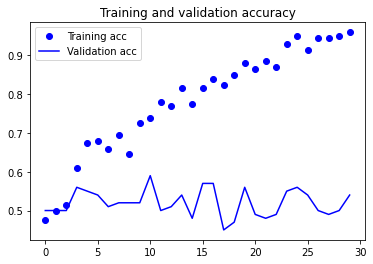

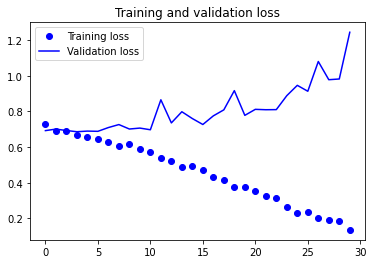

In [28]:
# Plotting the accuracies for the first model
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy stalls at 46-58%. Our validation loss reaches its minimum after only four epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (200), overfitting is our number one concern.We are going to augment our data in th next model to mitigate overfitting

In [29]:
# Configuring a number of random transformations on the images
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

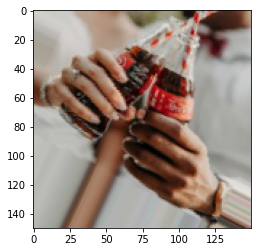

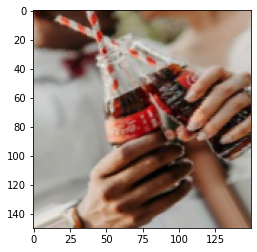

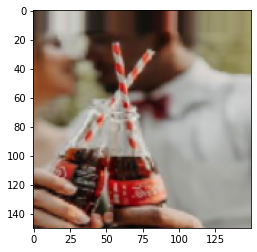

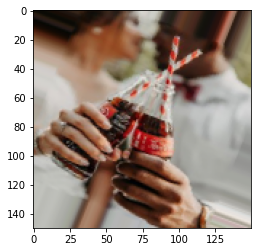

In [30]:
# This is module with image preprocessing utilities, Let's look at some of the augmented images
from keras.preprocessing import image

fnames = [os.path.join(train_LogoYes_dir, fname) for fname in os.listdir(train_LogoYes_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [31]:
#To further fight overfitting, we will also add a Dropout layer to our network, right before the densely-connected classifier:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [32]:
#Let's train our network using data augmentation and dropout:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


10/10 [==============================] - 3s 215ms/step - loss: 0.7037 - acc: 0.4350 - val_loss: 0.6913 - val_acc: 0.5300
Epoch 2/100
10/10 [==============================] - 2s 200ms/step - loss: 0.6967 - acc: 0.4800 - val_loss: 0.6896 - val_acc: 0.5900
Epoch 3/100
10/10 [==============================] - 2s 197ms/step - loss: 0.6909 - acc: 0.5500 - val_loss: 0.6901 - val_acc: 0.5000
Epoch 4/100
10/10 [==============================] - 2s 198ms/step - loss: 0.6959 - acc: 0.5200 - val_loss: 0.6900 - val_acc: 0.5500
Epoch 5/100
10/10 [==============================] - 2s 198ms/step - loss: 0.6854 - acc: 0.5150 - val_loss: 0.7023 - val_acc: 0.5200
Epoch 6/100
10/10 [==============================] - 2s 196ms/step - loss: 0.6829 - acc: 0.5100 - val_loss: 0.7056 - val_acc: 0.5200
Epoch 7/100
10/10 [==============================] - 2s 197ms/step - loss: 0.6837 - acc: 0.5400 - val_loss: 0.6987 - val_acc: 0.5300
Epoch 8/100
10/10 [==============================] - 2s 196ms/step - loss: 0.6799

In [33]:
model.save('LogoYes_LogoNo_2.h5')

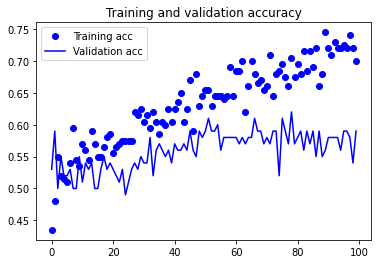

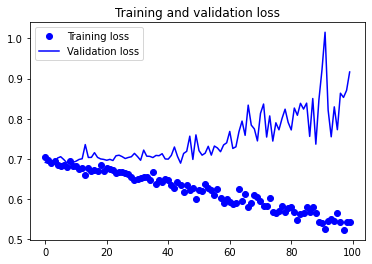

In [34]:
# Let's plot the accuracies again
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Although the validation accuracy did'not increase significantly(+5.5%), the overfit severity of the model is lesser. This overfit persistence might be due to the model's inputs that  are still heavily intercorrelated, since they come from a small number of images -- We are going to use now a pretrained model used on a much larger data samples

In [35]:
## Using the pretrained model VGG16
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [36]:
# Checking the VGG16 Summary
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [37]:
# Building the model, including the VGG16 and the dense network
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_1 (Dropout)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Checking the number of trainable weights before freezing the conv base
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
# freezing the conv base
conv_base.trainable = False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [40]:
# Training the dense network
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
10/10 - 4s - loss: 0.7808 - acc: 0.5000 - val_loss: 0.7404 - val_acc: 0.5000 - 4s/epoch - 442ms/step
Epoch 2/30
10/10 - 2s - loss: 0.7052 - acc: 0.5800 - val_loss: 0.7087 - val_acc: 0.5400 - 2s/epoch - 215ms/step
Epoch 3/30
10/10 - 2s - loss: 0.7586 - acc: 0.4950 - val_loss: 0.6917 - val_acc: 0.5800 - 2s/epoch - 211ms/step
Epoch 4/30
10/10 - 2s - loss: 0.6943 - acc: 0.5850 - val_loss: 0.6682 - val_acc: 0.6200 - 2s/epoch - 207ms/step
Epoch 5/30
10/10 - 2s - loss: 0.7359 - acc: 0.5050 - val_loss: 0.6742 - val_acc: 0.6100 - 2s/epoch - 209ms/step
Epoch 6/30
10/10 - 2s - loss: 0.7032 - acc: 0.5900 - val_loss: 0.6621 - val_acc: 0.6300 - 2s/epoch - 208ms/step
Epoch 7/30
10/10 - 2s - loss: 0.6751 - acc: 0.5500 - val_loss: 0.6592 - val_acc: 0.6300 - 2s/epoch - 205ms/step
Epoch 8/30
10/10 - 2s - loss: 0.6470 - acc: 0.6350 - val_loss: 0.6588 - val_acc: 0.6300 - 2s/epoch - 209ms/step
Epoch 9/30
10/10 - 2s - loss: 0.6386 - acc: 0.6450 - val_loss: 0.6382 - val_acc: 0.6200 - 2s/epoch - 209

In [41]:
# Saving the model
model.save('LogoYes_LogoNo_3.h5')

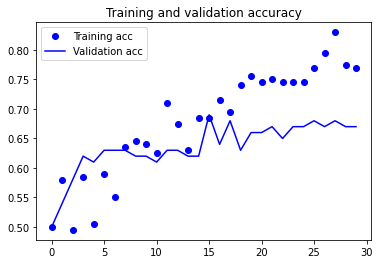

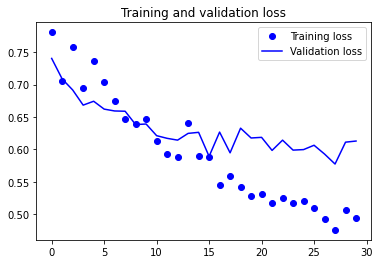

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As We can see, we reach a validation accuracy of about 67%. This is much better than our small convnet trained from scratch.

### 6. Fine-tune the System

In [43]:
# freezing top layer
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [44]:
# Finetuning
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
10/10 [==============================] - 4s 240ms/step - loss: 0.5069 - acc: 0.7450 - val_loss: 0.6114 - val_acc: 0.6900
Epoch 2/100
10/10 [==============================] - 2s 224ms/step - loss: 0.4879 - acc: 0.7750 - val_loss: 0.5722 - val_acc: 0.6800
Epoch 3/100
10/10 [==============================] - 2s 227ms/step - loss: 0.4652 - acc: 0.7850 - val_loss: 0.6136 - val_acc: 0.6700
Epoch 4/100
10/10 [==============================] - 2s 223ms/step - loss: 0.4580 - acc: 0.8300 - val_loss: 0.6280 - val_acc: 0.6700
Epoch 5/100
10/10 [==============================] - 2s 223ms/step - loss: 0.4273 - acc: 0.7750 - val_loss: 0.6031 - val_acc: 0.6900
Epoch 6/100
10/10 [==============================] - 2s 225ms/step - loss: 0.3978 - acc: 0.8050 - val_loss: 0.6228 - val_acc: 0.6700
Epoch 7/100
10/10 [==============================] - 2s 225ms/step - loss: 0.3547 - acc: 0.8450 - val_loss: 0.5933 - val_acc: 0.6700
Epoch 8/100
10/10 [==============================] - 2s 222ms/step - 

In [45]:
model.save('LogoYes_LogoNo_4.h5')

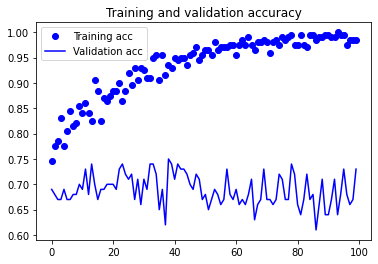

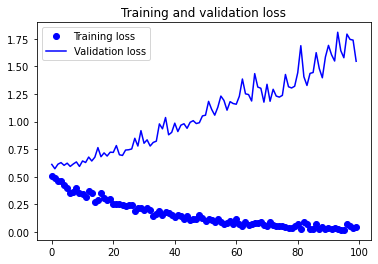

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After fine-tuning, our validation accuracy increases from 67% to 73% but the model overfits.Further regularization has not improved the overfitting as anticipated. This suggests that the model is still complex and does not translate to the required gain. We are going to leverage Inception v3, a Google pretrained model on  imagenet. Inception v3 is more robust and include batch normalization that may help reducing the overfititting

In [47]:
#Pretrained Google Inception_v3
from tensorflow.keras.applications.inception_v3 import InceptionV3

conv_base= InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights='imagenet')


In [48]:
# Inception V3 summary
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_8[0][0]']               
 alization)                                                                                       
                                                                                       

In [49]:
last_layer = conv_base.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [50]:
for layer in conv_base.layers:
  layer.trainable = False

In [51]:
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
#Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(conv_base.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [52]:
# Training the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
10/10 [==============================] - 7s 297ms/step - loss: 0.7821 - acc: 0.5950 - val_loss: 0.5733 - val_acc: 0.7200
Epoch 2/100
10/10 [==============================] - 2s 212ms/step - loss: 0.5198 - acc: 0.7500 - val_loss: 0.7343 - val_acc: 0.6700
Epoch 3/100
10/10 [==============================] - 2s 212ms/step - loss: 0.5459 - acc: 0.7300 - val_loss: 0.5594 - val_acc: 0.7200
Epoch 4/100
10/10 [==============================] - 2s 210ms/step - loss: 0.4975 - acc: 0.7600 - val_loss: 0.4981 - val_acc: 0.7400
Epoch 5/100
10/10 [==============================] - 2s 210ms/step - loss: 0.4108 - acc: 0.8300 - val_loss: 0.5286 - val_acc: 0.7600
Epoch 6/100
10/10 [==============================] - 2s 212ms/step - loss: 0.4267 - acc: 0.8050 - val_loss: 0.5556 - val_acc: 0.7500
Epoch 7/100
10/10 [==============================] - 2s 212ms/step - loss: 0.3576 - acc: 0.8150 - val_loss: 0.6584 - val_acc: 0.7200
Epoch 8/100
10/10 [==============================] - 2s 211ms/step - 

In [53]:
# Finetuning the Inception v3 model
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in conv_base.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [54]:
# Training the model after unfreezing the layer mixed6
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
10/10 [==============================] - 6s 304ms/step - loss: 0.1221 - acc: 0.9600 - val_loss: 1.3232 - val_acc: 0.7300
Epoch 2/100
10/10 [==============================] - 2s 214ms/step - loss: 0.1558 - acc: 0.9250 - val_loss: 1.2898 - val_acc: 0.7300
Epoch 3/100
10/10 [==============================] - 2s 219ms/step - loss: 0.1502 - acc: 0.9450 - val_loss: 1.2656 - val_acc: 0.7300
Epoch 4/100
10/10 [==============================] - 2s 209ms/step - loss: 0.1883 - acc: 0.9300 - val_loss: 1.2408 - val_acc: 0.7300
Epoch 5/100
10/10 [==============================] - 2s 210ms/step - loss: 0.1916 - acc: 0.9200 - val_loss: 1.2249 - val_acc: 0.7300
Epoch 6/100
10/10 [==============================] - 2s 212ms/step - loss: 0.1750 - acc: 0.9150 - val_loss: 1.2061 - val_acc: 0.7300
Epoch 7/100
10/10 [==============================] - 2s 209ms/step - loss: 0.1695 - acc: 0.9250 - val_loss: 1.1895 - val_acc: 0.7300
Epoch 8/100
10/10 [==============================] - 2s 210ms/step - 

In [55]:
model.save('LogoYes_LogoNo_5.h5')

No improvement observed after using and finetuning the Inception V3 model. This overfit invariability observed accross 2 pretrained models could be an indication that a much more simpler needed would be need to substantially reduce the amount of overfit.

In [56]:
# We can now finally evaluate this model on the test data:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 267 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.8389512896537781


The test accuracy is 84% (higher than that of validation). This suggests that that the model overfits part of the data in the test set which may be attributable to the larger size of test set as compared to the validation one.

### 7. Present Your Solution

The task consisted in classifying the images with logo from images without logo. We started by building the model from scrath, then augmenting with data to reduce overfitting on the small data set at hand. This has resulted in a small increase in the accuracy(5.5% from initial accuracy of 54%). We took a step forward and leverage the VGG16 pretrained model in combination with the drop-out regularization, which increased the validation accuracy(+35%) but overfitted the data. Morever, we made use of the more robust Google pretrained model " Inception V3" which displayed a little improvement on the validation accuracy but did not solve the persistent overfitting issue. In addition, the test accuracy has been found to be lower than that of the validation of the best model. However, we can note that, despite the fact that the models have been overfitting, making used of pretrained models in combination with data augmentation proved to be improving the validation accuracy on our very small data set. Therefore, we can think of the following for further improving our model:
- Applying early stopping technique when training the model
- Reducing the complexity of the model by lowering the number of neurons in the dense network(64 for example)
- Collecting more data of the two classes so as to have enough in the training set. Although existing models and data augmentation have improved the validation accuracy, we could have gotten better performance with more data. In fact, given the small amount of data, data augmentation did not create new images, it simply remixed existing images, therefore there was no such a difference in the high level representations extracted . On the other hand, pretrained models contained representations of a much broader images dataset but not necesseraly of the contextual logo images at hand. Therefore increasing the number logo images would be beneficial for the model.

Besides all the above, the GPU usage limit of Colab did not sometimes contribute to the to the flawless execution of the project. Therefore,  more reliable access to Colab’s fastest GPUs in Colab Pro and Pro+ may be required.

In the nutchel, the model is promising and can potentially be further improved. However, from a business perspective, one should evaluate the return on accuracy by factoring the additional cost (computational ressources, images collection..) and the benefits provided by the accuracy to inform the decision to proceed with the project.
